In [ ]:
80@bcnpIA

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
plt.style.use('ggplot')

In [10]:
ratings = pd.read_csv('./ratings.csv')

In [11]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [15]:
ratings.shape

(105339, 4)

<AxesSubplot:xlabel='rating', ylabel='count'>

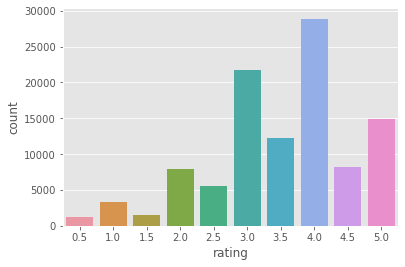

In [17]:
sns.countplot(x='rating', data=ratings)

In [ ]:
#distinc count movies ?¿?¿

In [18]:
movies = pd.read_csv('./movies.csv')

In [19]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [21]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
#ahora tengo dos tablas que las vamos a juntar creando un nuevo dataset para juntar los ratings usando el merch

rated_movies= ratings.merge(movies, on='movieId')[['userId','movieId','title','rating']]

In [26]:
rated_movies.head()

,userId,movieId,title,rating
0,1,16,Casino (1995),4.0
1,9,16,Casino (1995),4.0
2,12,16,Casino (1995),1.5
3,24,16,Casino (1995),4.0
4,29,16,Casino (1995),3.0


In [27]:
rated_movies[rated_movies['title']=='Casino (1995)']

,userId,movieId,title,rating
0,1,16,Casino (1995),4.0
1,9,16,Casino (1995),4.0
2,12,16,Casino (1995),1.5
3,24,16,Casino (1995),4.0
4,29,16,Casino (1995),3.0
...,...,...,...,...
79,625,16,Casino (1995),1.0
80,627,16,Casino (1995),4.0
81,628,16,Casino (1995),3.5
82,659,16,Casino (1995),3.0


In [30]:
#hacemos pivot tables, que son condiciones para ver....

#len las veces que se a puntuado 
mean_ratings=rated_movies.pivot_table(index='title', values='rating',aggfunc=[len,np.mean])

In [31]:
mean_ratings.columns=['ratings','mean rating']

In [32]:
mean_ratings.head()

,ratings,mean rating
title,,
'71 (2014),1,3.500
'Hellboy': The Seeds of Creation (2004),1,3.000
'Round Midnight (1986),1,2.500
'Til There Was You (1997),3,4.000
"'burbs, The (1989)",20,3.125


In [34]:
mean_ratings.sort_values(by='mean rating',ascending=False).head(10)

,ratings,mean rating
title,,
"Saddest Music in the World, The (2003)",1,5.0
Interstate 60 (2002),2,5.0
"Gunfighter, The (1950)",1,5.0
Heima (2007),1,5.0
Limelight (1952),1,5.0
"Plague Dogs, The (1982)",1,5.0
Love Me If You Dare (Jeux d'enfants) (2003),1,5.0
Syrup (2013),1,5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003),1,5.0


In [35]:
mean_ratings[mean_ratings['ratings']>100].sort_values(by='mean rating',ascending=False).head(10)

,ratings,mean rating
title,,
"Shawshank Redemption, The (1994)",308,4.454545
"Godfather, The (1972)",210,4.392857
"Usual Suspects, The (1995)",228,4.328947
Monty Python and the Holy Grail (1975),154,4.301948
Schindler's List (1993),248,4.296371
One Flew Over the Cuckoo's Nest (1975),143,4.272727
Fargo (1996),201,4.271144
"Matrix, The (1999)",261,4.264368
"Godfather: Part II, The (1974)",140,4.260714


In [36]:
#lo ponemos entre corchetes para ver el resultado en la tabla 

mean_ratings[mean_ratings.index.str.contains('Star Wars')]

,ratings,mean rating
title,,
Star Wars: Episode I - The Phantom Menace (1999),136,3.102941
Star Wars: Episode II - Attack of the Clones (2002),68,2.926471
Star Wars: Episode III - Revenge of the Sith (2005),54,3.481481
Star Wars: Episode IV - A New Hope (1977),273,4.188645
Star Wars: Episode V - The Empire Strikes Back (1980),228,4.228070
Star Wars: Episode VI - Return of the Jedi (1983),222,4.031532
Star Wars: Episode VII - The Force Awakens (2015),7,3.928571
Star Wars: The Clone Wars (2008),9,3.055556


In [38]:
#filtro colaborativo, crearemos usuarios por pelicula

ratings_pivot=rated_movies.pivot_table(index='userId', columns='title', values='rating',aggfunc=np.mean)

In [40]:
ratings_pivot.fillna(0,inplace=True)

In [41]:
ratings_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#pivotea para que se queden para hacer lo del diferencial, la distancia entre unos valores y otros
sparse_ratings=sp.sparse.csr_matrix(ratings_pivot.values)

In [45]:
user_similarity=cosine_similarity(sparse_ratings)

In [46]:
item_similarity=cosine_similarity(sparse_ratings.T)

In [47]:
item_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.09832433,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.14748649,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.09832433,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.04899235,
        0.        ],
       [0.09832433, 0.14748649, 0.09832433, ..., 0.04899235, 1.        ,
        0.09832433],
       [0.        , 0.        , 1.        , ..., 0.        , 0.09832433,
        1.        ]])

In [48]:
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

In [49]:
user_similarity_df

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153493
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064822
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109658
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157809
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.154519,0.061737,0.079452,0.014011,0.048993,0.011697,0.207565,0.070784,0.098666,0.037486,...,0.156459,0.064727,0.059112,0.082097,0.093945,1.000000,0.101132,0.068558,0.091651,0.102100
665,0.245071,0.050948,0.092821,0.042643,0.055431,0.131016,0.178275,0.033969,0.116292,0.026110,...,0.204038,0.061159,0.020011,0.052398,0.125183,0.101132,1.000000,0.096167,0.211776,0.172575
666,0.238660,0.051423,0.080940,0.174275,0.026053,0.068479,0.174009,0.039911,0.084109,0.049958,...,0.138398,0.038339,0.037231,0.121721,0.079120,0.068558,0.096167,1.000000,0.123252,0.158383


In [50]:
item_similarity_df= pd.DataFrame(item_similarity, index=ratings_pivot.columns, columns=ratings_pivot.columns)

In [51]:
item_similarity_df

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.342682,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.158272,0.000000,0.098324,0.000000
'Hellboy': The Seeds of Creation (2004),0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.147486,0.000000
'Round Midnight (1986),0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.081094,0.000000,0.257012,0.680414,...,0.000000,0.227429,0.141421,0.000000,0.100219,0.0,0.221581,0.000000,0.098324,1.000000
'Til There Was You (1997),0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
"'burbs, The (1989)",0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.031610,0.231897,0.100923,0.000000,...,0.057358,0.000000,0.000000,0.000000,0.212684,0.0,0.104192,0.000000,0.161820,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.202735,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
xXx (2002),0.158272,0.000000,0.221581,0.0,0.104192,0.189927,0.232954,0.000000,0.214237,0.279996,...,0.106301,0.050394,0.031336,0.221581,0.159413,0.0,1.000000,0.344367,0.135389,0.221581
xXx: State of the Union (2005),0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.225606,0.000000,0.113833,0.000000,...,0.141405,0.000000,0.000000,0.498273,0.170617,0.0,0.344367,1.000000,0.048992,0.000000


In [54]:
#con este método podemos ver que películas son similares a la nuestra
item_similarity_df['10 (1979)'].sort_values(ascending=False)

title
10 (1979)                                                 1.00000
Katyn (2007)                                              0.96225
Gatekeepers, The (2012)                                   0.96225
Fury, The (1978)                                          0.96225
Baader Meinhof Komplex, Der (2008)                        0.96225
                                                           ...   
Kautokeino Rebellion, The (Kautokeino-opprøret) (2008)    0.00000
Katsastus (1988)                                          0.00000
Kaspar Hauser (1993)                                      0.00000
Karla (2006)                                              0.00000
Lady Snowblood (Shurayukihime) (1973)                     0.00000
Name: 10 (1979), Length: 10323, dtype: float64

In [ ]:
#lo mismo podemos hacer por usuarios ver a que usuarios que le gusta lo mismo
#hacer el pivot, funcion de matrices y utilizar la función de coseno
#josephgallart en linkedIn